In [163]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline



In [164]:
# read-in the excel spreadsheet using pandas 
df = pd.read_excel('Online_retail.xlsx', sheet_name='Online Retail')

# Remove  cancelled orders
df = df.loc[df['Quantity'] > 0]

# Remove any entries without CustomerID
df = df[pd.notnull(df['CustomerID'])]

# Remove incomplete month
df = df.loc[df['InvoiceDate'] < '2011-12-01']

# Calculate total sales from the Quantity and UnitPrice
df['Sales'] = df['Quantity'] * df['UnitPrice']

# use groupby to aggregate sales by CustomerID
customer_df = df.groupby('CustomerID').agg({'Sales': sum, 
                                            'InvoiceNo': lambda x: x.nunique()})

# Select the columns of interest
customer_df.columns = ['TotalSales', 'OrderCount'] 

# create a new column 'AvgOrderValue'
customer_df['AvgOrderValue'] = customer_df['TotalSales'] / customer_df['OrderCount']


rank_df = customer_df.rank(method='first')
# normalized_df = (rank_df - rank_df.mean()) / rank_df.std()
normalized_df =  2* (rank_df - rank_df.mean()) / (rank_df.max() - rank_df.min())
# normalized_df.head(10)

In [165]:
def initiate_centroids(k, dset):
    '''
    Select k data points as centroids
    k: number of centroids
    dset: pandas dataframe
    '''
    centroids = dset.sample(k)
    return centroids

def rsserr(a,b):
    '''
    Calculate the root of sum of squared errors. 
    a and b are numpy arrays
    '''
    return np.square(np.sum((a-b)**2)) 

def cluster(k, df):
    centroids = initiate_centroids(k, df)
    for i, centroid in enumerate(range(centroids.shape[0])):
        err = rsserr(centroids.iloc[centroid,:], df.iloc[36,:])
        print('Error for centroid {0}: {1:.2f}'.format(i, err))
    df['centroid'], df['error'] = centroid_assignation(df, centroids)
    #df.head()
    return df


In [166]:
np.random.seed(42)
k=4
df1 = normalized_df[['OrderCount','TotalSales']]
df1 = cluster(k, df1)
df2 = normalized_df[['OrderCount','AvgOrderValue']]
#df2 = cluster(k, df2)
df3 = normalized_df[['TotalSales','AvgOrderValue']]
#df3 = cluster(k, df3)

Error for centroid 0: 0.82
Error for centroid 1: 3.82
Error for centroid 2: 1.17
Error for centroid 3: 8.86


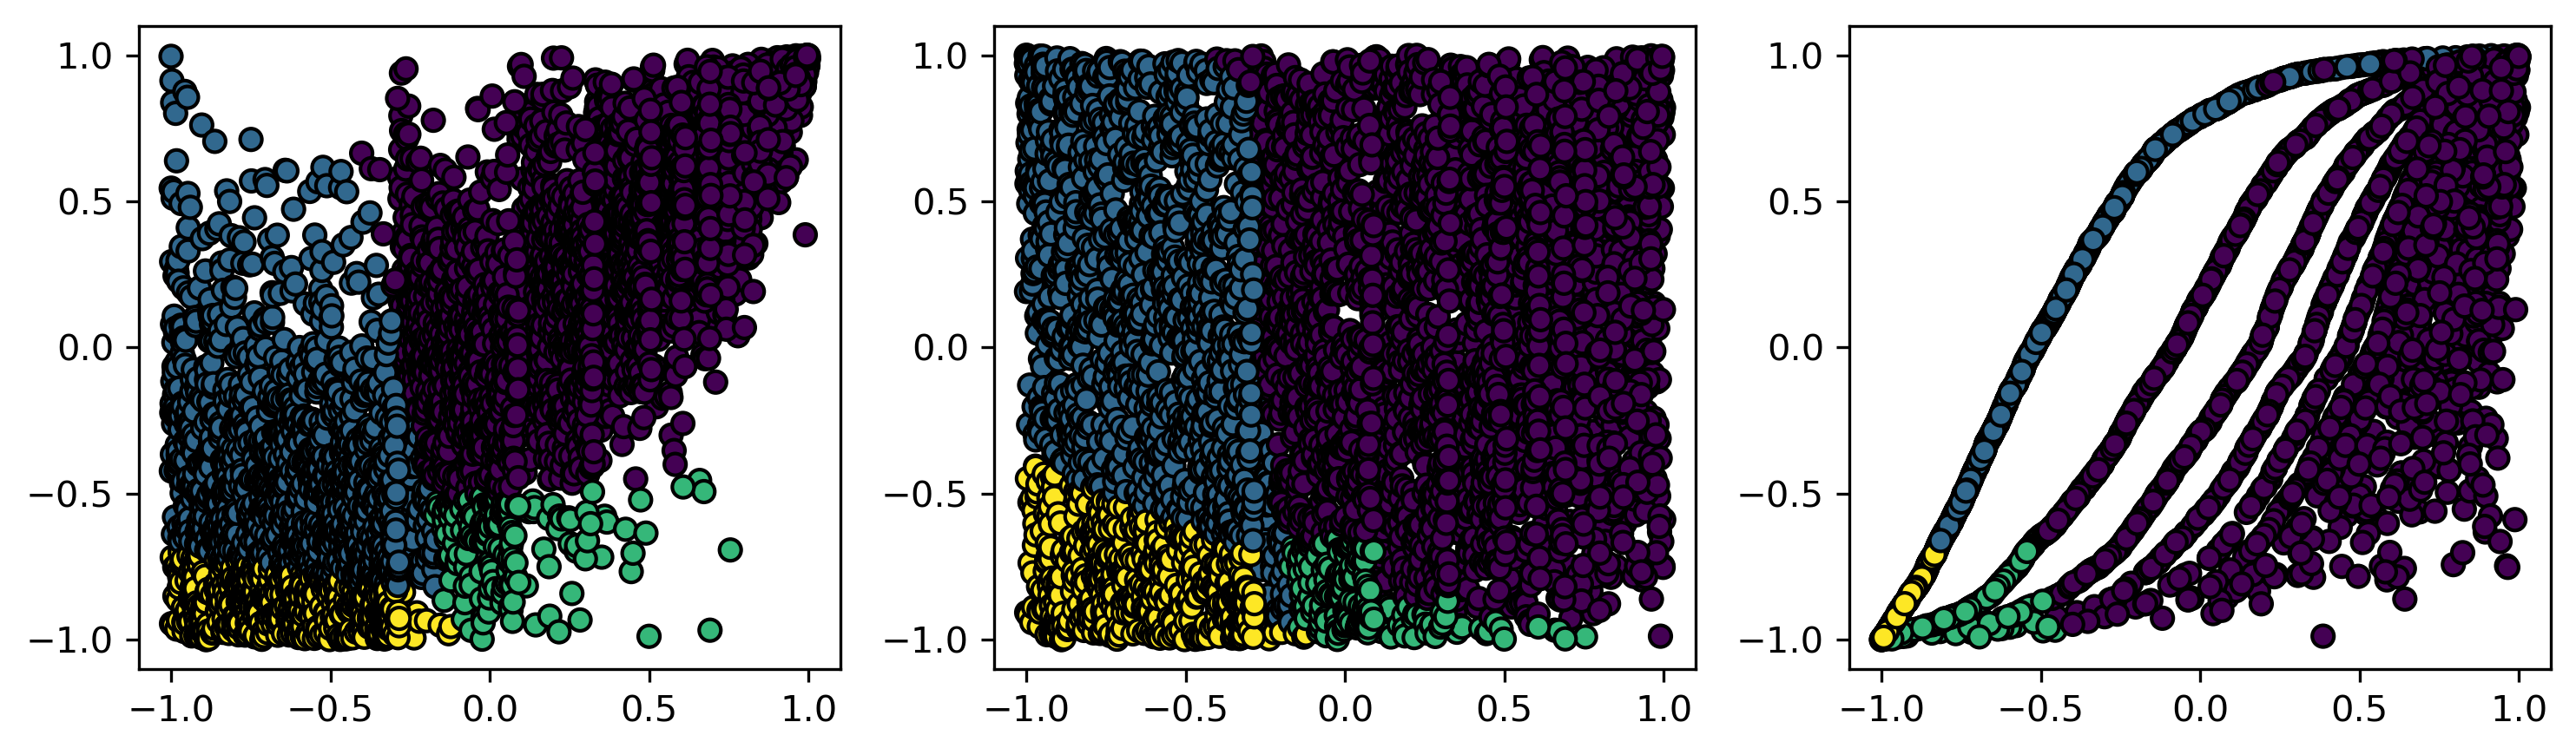

In [167]:

plt.figure(figsize=(10,3), dpi=300)
plt.subplot(1,3,1)
plt.scatter(df1.iloc[:,0], df1.iloc[:,1],  c=df1['centroid'].iloc[:], cmap=plt.cm.viridis, edgecolor='k')
plt.subplot(1,3,2)
plt.scatter(df2.iloc[:,0], df2.iloc[:,1],  c=df1['centroid'].iloc[:], cmap=plt.cm.viridis, edgecolor='k')
plt.subplot(1,3,3)
plt.scatter(df3.iloc[:,0], df3.iloc[:,1],  c=df1['centroid'].iloc[:], cmap=plt.cm.viridis, edgecolor='k')
plt.tight_layout()
plt.show()

In [168]:
#print("The total error is {0:.2f}".format(df['error'].sum()))

In [169]:
colnames = list(df1.columns[1:-1])
centroids = df.groupby('centroid').agg('mean').loc[:, colnames].reset_index(drop = True)
centroids

KeyError: 'centroid'

In [ ]:
df1.columns[1:-1]